In [54]:
#import get to call a get request on the site
from requests import get

#get the first page of the east bay housing prices
response = get('https://cleveland.craigslist.org/search/apa?hasPic=1&search_distance=10&postal=44113&availabilityMode=0&sale_date=all+dates') #get rid of those lame-o's that post a housing option without a pic using their filter

from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')

#get the macro-container for the housing posts
posts = html_soup.find_all('li', class_= 'result-row')
print(type(posts)) #to double check that I got a ResultSet
print(len(posts)) #to double check I got 120 (elements/page)

<class 'bs4.element.ResultSet'>
120


In [55]:
posts[0]

<li class="result-row" data-pid="7236434963">
<a class="result-image gallery" data-ids="3:00t0t_gSMKldDUAbW_0gw0b1,3:00B0B_jzbWS668QWX_0gw0b0,3:00k0k_csFOVTNAP6Y_0gw0aZ,3:00H0H_kj6gHOaqbqW_0gw0b0" href="https://cleveland.craigslist.org/apa/d/cleveland-9th-st-apt-306-nice-beds/7236434963.html">
<span class="result-price">$900</span>
</a>
<div class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2020-12-24 09:54" title="Thu 24 Dec 09:54:35 AM">Dec 24</time>
<h3 class="result-heading">
<a class="result-title hdrlnk" data-id="7236434963" href="https://cleveland.craigslist.org/apa/d/cleveland-9th-st-apt-306-nice-beds/7236434963.html" id="postid_7236434963">W 9th St APT 306, Nice 2 beds 2 baths For Rent.</a>
</h3>
<span class="result-meta">
<span class="result-price">$900</span>
<span class="housing">
                    2br -
                </span>
<span class="result-hood"> (

In [56]:
postone = (posts[0])
postone

<li class="result-row" data-pid="7236434963">
<a class="result-image gallery" data-ids="3:00t0t_gSMKldDUAbW_0gw0b1,3:00B0B_jzbWS668QWX_0gw0b0,3:00k0k_csFOVTNAP6Y_0gw0aZ,3:00H0H_kj6gHOaqbqW_0gw0b0" href="https://cleveland.craigslist.org/apa/d/cleveland-9th-st-apt-306-nice-beds/7236434963.html">
<span class="result-price">$900</span>
</a>
<div class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2020-12-24 09:54" title="Thu 24 Dec 09:54:35 AM">Dec 24</time>
<h3 class="result-heading">
<a class="result-title hdrlnk" data-id="7236434963" href="https://cleveland.craigslist.org/apa/d/cleveland-9th-st-apt-306-nice-beds/7236434963.html" id="postid_7236434963">W 9th St APT 306, Nice 2 beds 2 baths For Rent.</a>
</h3>
<span class="result-meta">
<span class="result-price">$900</span>
<span class="housing">
                    2br -
                </span>
<span class="result-hood"> (

In [57]:
#grab the price of the first post
post_one_price = postone.a.text
post_one_price.strip()

'$900'

In [58]:
#grab the time and datetime it was posted
post_one_time = postone.find('time', class_= 'result-date')
post_one_datetime = post_one_time['datetime']
post_one_datetime

'2020-12-24 09:54'

In [59]:
#title is a and that class, link is grabbing the href attribute of that variable
post_one_title = postone.find('a', class_='result-title hdrlnk')
post_one_link = post_one_title['href']

#easy to grab the post title by taking the text element of the title variable
post_one_title_text = post_one_title.text
post_one_title_text

'W 9th St APT 306, Nice 2 beds 2 baths For Rent.'

In [60]:
#grabs the whole segment of housing details. We will need missing value handling in the loop as this kind of detail is not common in posts
#the text can be split, and we can use indexing to grab the elements we want. number of bedrooms is the first element.
#sqft is the third element

post_one_num_bedrooms = postone.find('span', class_ = 'housing').text.split()[0]

post_one_sqft = postone.find('span', class_ = 'housing').text.split() #cleans the ft2 at the end

post_one_num_bedrooms
post_one_sqft

['2br', '-']

In [61]:
#neighborhood
post_one_hood = posts[0].find('span', class_='result-hood')
post_one_hood

<span class="result-hood"> (Cleveland, OH)</span>

In [62]:

#build out the loop
from time import sleep
import re
from random import randint #avoid throttling by not sending too many requests one after the other
from warnings import warn
from time import time
from IPython.core.display import clear_output
import numpy as np

#find the total number of posts to find the limit of the pagination
results_num = html_soup.find('div', class_= 'search-legend')
results_total = int(results_num.find('span', class_='totalcount').text)

In [63]:
#each page has 119 posts so each new page is defined as follows: s=120, s=240, s=360, and so on. So we need to step in size 120 in the np.arange function
pages = np.arange(0, results_total+1, 120)

In [64]:
iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
bedroom_counts = []
sqfts = []
post_links = []
post_prices = []

In [77]:
iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
bedroom_counts = []
sqfts = []
post_links = []
post_prices = []

for page in pages:

    response = get("https://cleveland.craigslist.org/search/apa?hasPic=1&search_distance=10&postal=44113&availabilityMode=0&sale_date=all+dates" 
                   + "s=" #the parameter for defining the page number 
                   + str(page) #the page number in the pages array from earlier
                   + "&hasPic=1"
                   + "&availabilityMode=0")

    sleep(randint(1,5))
     
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    #define the html text
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    #define the posts
    posts = html_soup.find_all('li', class_= 'result-row')
        
    #extract data item-wise
    for post in posts:

        if post.find('span', class_ = 'result-hood') is not None:

            #posting date
            #grab the datetime element 0 for date and 1 for time
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)

            #neighborhoods
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)

            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_title_texts.append(post_title_text)

            #post link
            post_link = post_title['href']
            post_links.append(post_link)
            
            #removes the \n whitespace from each side, removes the currency symbol, and turns it into an int
            post_price = (post.a.text.strip().replace("$", ""))
            post_prices.append(post_price)
            
            if post.find('span', class_ = 'housing') is not None:
                
                #if the first element is accidentally square footage
                if 'ft2' in post.find('span', class_ = 'housing').text.split()[0]:
                    
                    #make bedroom nan
                    bedroom_count = np.nan
                    bedroom_counts.append(bedroom_count)
                    
                    #make sqft the first element
                    sqft = int(post.find('span', class_ = 'housing').text.split()[0][:-3])
                    sqfts.append(sqft)
                    
                #if the length of the housing details element is more than 2
                elif len(post.find('span', class_ = 'housing').text.split()) > 2:
                    
                    #therefore element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    
                    #and sqft will be number 3, so set these here and append
                    sqft = int(post.find('span', class_ = 'housing').text.split()[2][:-3])
                    sqfts.append(sqft)
                    
                #if there is num bedrooms but no sqft
                elif len(post.find('span', class_ = 'housing').text.split()) == 2:
                    
                    #therefore element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    
                    #and sqft will be number 3, so set these here and append
                    sqft = np.nan
                    sqfts.append(sqft)                    
                
                else:
                    bedroom_count = np.nan
                    bedroom_counts.append(bedroom_count)
                
                    sqft = np.nan
                    sqfts.append(sqft)
                
            #if none of those conditions catch, make bedroom nan, this won't be needed    
            else:
                bedroom_count = np.nan
                bedroom_counts.append(bedroom_count)
                
                sqft = np.nan
                sqfts.append(sqft)
            #    bedroom_counts.append(bedroom_count)
                
            #    sqft = np.nan
            #    sqfts.append(sqft)
                
    iterations += 1
    print("Page " + str(iterations) + " scraped successfully!")

print("\n")

print("Scrape complete!")

Page 1 scraped successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!
Page 5 scraped successfully!
Page 6 scraped successfully!
Page 7 scraped successfully!
Page 8 scraped successfully!
Page 9 scraped successfully!
Page 10 scraped successfully!
Page 11 scraped successfully!
Page 12 scraped successfully!
Page 13 scraped successfully!
Page 14 scraped successfully!


Scrape complete!


In [78]:
import pandas as pd

cle_apts = pd.DataFrame({'posted': post_timing,
                       'neighborhood': post_hoods,
                       'post title': post_title_texts,
                       'number bedrooms': bedroom_counts,
                        'sqft': sqfts,
                        'URL': post_links,
                       'price': post_prices})
print(eb_apts.info())
cle_apts.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 108
Data columns (total 7 columns):
posted             109 non-null datetime64[ns]
neighborhood       109 non-null object
post title         109 non-null object
number bedrooms    107 non-null float64
sqft               85 non-null float64
URL                109 non-null object
price              109 non-null object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.8+ KB
None


,posted,neighborhood,post title,number bedrooms,sqft,URL,price
0,2020-12-24 09:54,"(Cleveland, OH)","W 9th St APT 306, Nice 2 beds 2 baths For Rent.",2,NaN,https://cleveland.craigslist.org/apa/d/clevela...,900
1,2021-01-04 12:59,"(Cleveland, OH)","2216 W 40th Pl, Something New Update Move in R...",2,2332.0,https://cleveland.craigslist.org/apa/d/clevela...,890
2,2020-12-05 18:50,"(Cleveland, OH)",3 Bedroom Near Ohio City Available for Rent *D...,3,NaN,https://cleveland.craigslist.org/apa/d/clevela...,"1,000"
3,2020-12-06 08:43,"((Ohio City, Cleveland))",Ohio City / W 41st St.,1,600.0,https://cleveland.craigslist.org/apa/d/clevela...,500
4,2021-01-05 22:56,(Cleveland),Breathtaking. Walls of glass frame a panorama ...,3,3526.0,https://cleveland.craigslist.org/apa/d/clevela...,"7,000"
5,2020-12-13 12:47,(cleveland),"Spacious 3 bed, 3 bath house for rent!!",3,2164.0,https://cleveland.craigslist.org/apa/d/clevela...,"1,250"
6,2020-12-13 12:47,(cleveland),"Spacious 3 bed, 3 bath house for rent!!",3,2164.0,https://cleveland.craigslist.org/apa/d/clevela...,"1,250"
7,2020-12-13 12:47,(cleveland),"Spacious 2 bed, 2 bath house for rent!!",2,1128.0,https://cleveland.craigslist.org/apa/d/clevela...,950
8,2020-12-13 12:47,(cleveland),"Spacious 2 bed, 2 bath house for rent!!",2,1128.0,https://cleveland.craigslist.org/apa/d/clevela...,950
9,2020-12-09 11:41,"(Cleveland, Ohio City, Tremont)",FLOOR TO CEILING WINDOWS w/ full Laundry Room ...,1,1000.0,https://cleveland.craigslist.org/apa/d/clevela...,"1,300"


In [89]:

#first things first, drop duplicate URLs because people are spammy on Craigslist. 
#Let's see how many uniqe posts we really have.
cle_apts = cle_apts.drop_duplicates(subset='URL')
len(cle_apts.drop_duplicates(subset='URL'))

#make the number bedrooms to a float (since np.nan is a float too)
cle_apts['number bedrooms'] = cle_apts['number bedrooms'].apply(lambda x: float(x))

#make the price to a float (since np.nan is a float too)
cle_apts['price'] = cle_apts['price'].apply(lambda x: float(x))

#convert datetime string into datetime object to be able to work with it
from datetime import datetime

cle_apts['posted'] = pd.to_datetime(cle_apts['posted'])

#Looking at what neighborhoods there are with cle_apts['neighborhood'].unique() allowed me to see what
#I needed to deal with in terms of cleaning those.

#remove the parenthesis from the left and right of the neighborhoods
cle_apts['neighborhood'] = cle_apts['neighborhood'].map(lambda x: x.lstrip('(').rstrip(')'))

#titlecase them
cle_apts['neighborhood'] = cle_apts['neighborhood'].str.title()

#just take the first name of the neighborhood list, splitting on the '/' delimiter
cle_apts['neighborhood'] = cle_apts['neighborhood'].apply(lambda x: x.split('/')[0])

#fix one-offs that
cle_apts['neighborhood'].replace('Belmont, Ca', 'Belmont', inplace=True)
cle_apts['neighborhood'].replace('Hercules, Pinole, San Pablo, El Sob', 'Hercules', inplace=True)

#remove whitespaces
cle_apts['neighborhood'] = cle_apts['neighborhood'].apply(lambda x: x.strip())

#save the clean data
cle_apts.to_csv("eb_apts_1642_Jan_2_19_clean.csv", index=False)

ValueError: could not convert string to float: '1,000'

In [80]:
cle_apts

,posted,neighborhood,post title,number bedrooms,sqft,URL,price
0,2020-12-24 09:54:00,"(Cleveland, Oh","W 9th St APT 306, Nice 2 beds 2 baths For Rent.",2.0,NaN,https://cleveland.craigslist.org/apa/d/clevela...,900
1,2021-01-04 12:59:00,"(Cleveland, Oh","2216 W 40th Pl, Something New Update Move in R...",2.0,2332.0,https://cleveland.craigslist.org/apa/d/clevela...,890
2,2020-12-05 18:50:00,"(Cleveland, Oh",3 Bedroom Near Ohio City Available for Rent *D...,3.0,NaN,https://cleveland.craigslist.org/apa/d/clevela...,"1,000"
3,2020-12-06 08:43:00,"((Ohio City, Cleveland",Ohio City / W 41st St.,1.0,600.0,https://cleveland.craigslist.org/apa/d/clevela...,500
4,2021-01-05 22:56:00,(Cleveland,Breathtaking. Walls of glass frame a panorama ...,3.0,3526.0,https://cleveland.craigslist.org/apa/d/clevela...,"7,000"
...,...,...,...,...,...,...,...
104,2021-01-15 06:10:00,(Cleveland,Modern garden apartment in the heart of Tremont.,1.0,760.0,https://cleveland.craigslist.org/apa/d/clevela...,900
105,2021-01-15 14:59:00,"(South Tremont, Cleveland Ohio",Cozy Tremont Loft 2326 Althen Ave. available Now,NaN,900.0,https://cleveland.craigslist.org/apa/d/clevela...,895
106,2020-12-10 07:16:00,(Cleveland Tremont (Professor Ave,Great little Single Family home at the heart o...,1.0,900.0,https://cleveland.craigslist.org/apa/d/clevela...,"1,200"
107,2020-12-16 17:49:00,(Cleveland,Small 3rd Floor Apartment Heart of Tremont,1.0,450.0,https://cleveland.craigslist.org/apa/d/clevela...,675


In [81]:
#first things first, drop duplicate URLs because people are spammy on Craigslist. 
#Let's see how many uniqe posts we really have.
cle_apts = cle_apts.drop_duplicates(subset='URL')
len(cle_apts.drop_duplicates(subset='URL'))

109

Data Analysis

In [90]:
cle_apts["sqft"].mean()


1196.2

In [91]:
c = cle_apts.select_dtypes(object).columns
cle_apts['price'] = cle_apts['price'].apply(pd.to_numeric,errors='coerce')

In [92]:
cle_apts

,posted,neighborhood,post title,number bedrooms,sqft,URL,price
0,2020-12-24 09:54:00,"(Cleveland, Oh","W 9th St APT 306, Nice 2 beds 2 baths For Rent.",2.0,NaN,https://cleveland.craigslist.org/apa/d/clevela...,900.0
1,2021-01-04 12:59:00,"(Cleveland, Oh","2216 W 40th Pl, Something New Update Move in R...",2.0,2332.0,https://cleveland.craigslist.org/apa/d/clevela...,890.0
2,2020-12-05 18:50:00,"(Cleveland, Oh",3 Bedroom Near Ohio City Available for Rent *D...,3.0,NaN,https://cleveland.craigslist.org/apa/d/clevela...,NaN
3,2020-12-06 08:43:00,"((Ohio City, Cleveland",Ohio City / W 41st St.,1.0,600.0,https://cleveland.craigslist.org/apa/d/clevela...,500.0
4,2021-01-05 22:56:00,(Cleveland,Breathtaking. Walls of glass frame a panorama ...,3.0,3526.0,https://cleveland.craigslist.org/apa/d/clevela...,NaN
...,...,...,...,...,...,...,...
104,2021-01-15 06:10:00,(Cleveland,Modern garden apartment in the heart of Tremont.,1.0,760.0,https://cleveland.craigslist.org/apa/d/clevela...,900.0
105,2021-01-15 14:59:00,"(South Tremont, Cleveland Ohio",Cozy Tremont Loft 2326 Althen Ave. available Now,NaN,900.0,https://cleveland.craigslist.org/apa/d/clevela...,895.0
106,2020-12-10 07:16:00,(Cleveland Tremont (Professor Ave,Great little Single Family home at the heart o...,1.0,900.0,https://cleveland.craigslist.org/apa/d/clevela...,NaN
107,2020-12-16 17:49:00,(Cleveland,Small 3rd Floor Apartment Heart of Tremont,1.0,450.0,https://cleveland.craigslist.org/apa/d/clevela...,675.0


In [93]:
cle_apts["price"].mean()

877.71875

In [100]:
# summary of statistics table

In [99]:
summary_stats = cle_apts[["price", "sqft", "number bedrooms"]].describe()
summary_stats

,price,sqft,number bedrooms
count,32.000000,85.000000,107.000000
mean,877.718750,1196.200000,1.981308
std,98.126395,531.365218,0.700152
min,500.000000,450.000000,1.000000
25%,815.000000,860.000000,2.000000
50%,900.000000,1000.000000,2.000000
75%,950.000000,1200.000000,2.000000
max,975.000000,3526.000000,4.000000


In [104]:
# Bar Plots
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <a list of 10 Patch objects>)

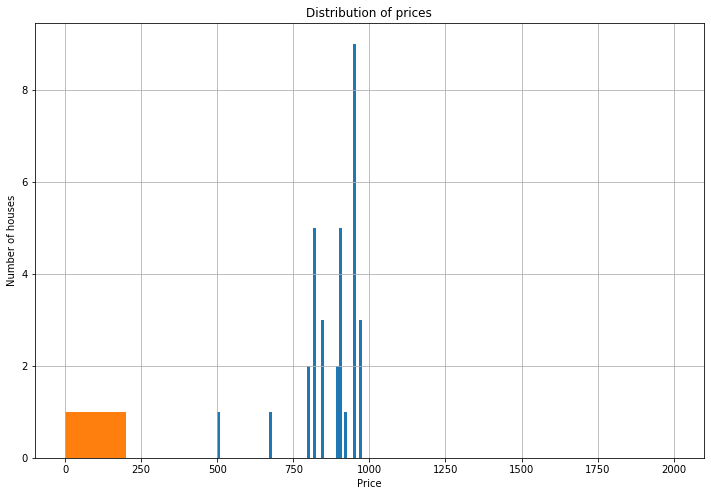

In [125]:


fig, ax = plt.subplots(1, 1, figsize = (12,8))
cle_apts['price'].hist(bins=50, ax=ax)
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.ylabel('Number of houses')
plt.hist(1, range=[0, 2000], align='mid')
